In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import seaborn as sbn

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20)

# <center>Modelos Lineales</center>

Se consideran modelos lineales aquellos en los cuales la variable a predecir $y$ es una combinación lineal de las características $x_1, x_2...$ 

\begin{equation}
    \hat y = w_0 + w_1x_1 + w_2x_2 + ...
\end{equation}

Los valores $w_0, w_1, w_2...$ son los coeficientes de la regresión y por tanto son aquellos que determinan el modelo y son el objetivo de las diferentes técnicas que se estudiarán. El coeficiente $w_0$ recibe el nombre de intercepto. En Skilearn, luego de entrenar un estimador, para obtener el valor de $w_0$ usamos <code>model.intercept_</code>, para los demás usamos <code>model.coef_</code>.

El módulo <code>linear_regression</code> de Skilearn contiene una gran variedad de modelos lineales y técnicas que podemos utilizar con estos. En el presente notebook se verán algunos de los principales tales como

   - <code>LinearRegression</code>
   - <code>Ridge</code>
   - <code>Lasso</code>
   - <code>SGDRegressor</code>

## <code>LinearRegression</code>

Este es el algoritmo de regresión lineal más básico y utiliza Ordinary Least Square (OLS) para hallar en valor de los coeficientes $w_i$, esto es, minimizar la suma cuadrática de los residuales entre la variable target $y$ y la combinación lineal de las características (features) $\textbf{X}$: 


\begin{equation}
   \text{Min}  \sum_{i=1}^n (X_i\cdot \textbf w - y_i)^2 
\end{equation}

### Regresión lineal simple

A continuación un ejemplo del uso de <code>LinearRegression</code> utiliando una única feature. Se utiliza la base de datos de autimóviles.

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [3]:
# Una pequeña limpieza
# Columnas del DataFrame
df.columns = df.columns.str.replace("-|/", "_", regex=True)
df.columns

Index(['symboling', 'normalized_losses', 'make', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'city_L_100km', 'horsepower_binned', 'diesel', 'gas'],
      dtype='object')

In [4]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

Si bien no existe una planilla estricta con la cual se contruyen los modelos de ML, esto suelen seguir algunos estándares:

   - Separar los datos en features $\textbf{X}$ y target $y$.
   - Dividir los conjuntos anteriores en datos para entrenamiento (training set) y datos para testeo 
       (testing set) del modelo luego de ser entrenado. 
   - Entrenar el modelo utilizando los datos de entrenamiento.
   - Utilizar el modelo para predecir.
   
Entre cada uno de estos pasos pueden existir tantos pasos intermedios como lo requiera el trabajo a realizar, por ejemplo, es habitual realizar una estandarización de los datos. 
  

In [5]:
# 1.
# Separemos los datos en features y target
# Features
X = df['engine_size'].values.reshape(-1,1)

# target
y = df['price'].values.reshape(-1,1)

In [6]:
X.shape, y.shape

((196, 1), (196, 1))

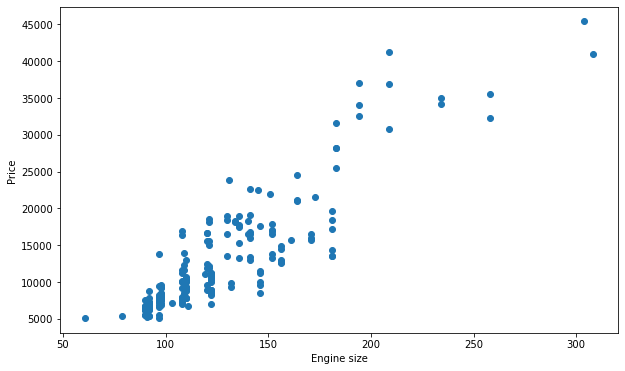

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, y)

ax.set_xlabel(f"Engine size")
ax.set_ylabel(f"Price")
plt.show()

In [8]:
# 2.
# Datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [9]:
len(X), len(X_train), len(X_test)

(196, 156, 40)

In [10]:
print(f"Porcentaje datos de prueba = {len(X_test)/len(X)*100: .2f}%")

Porcentaje datos de prueba =  20.41%


In [11]:
# 3. 
# Estimador y predictor
linear = LinearRegression()

# 4. Entrenamiento/Estimación
linear.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predictor
# Luego se pueden realizar predicciones
# Predicción para los datos de entrenamiento
y_pred = linear.predict(X_train)

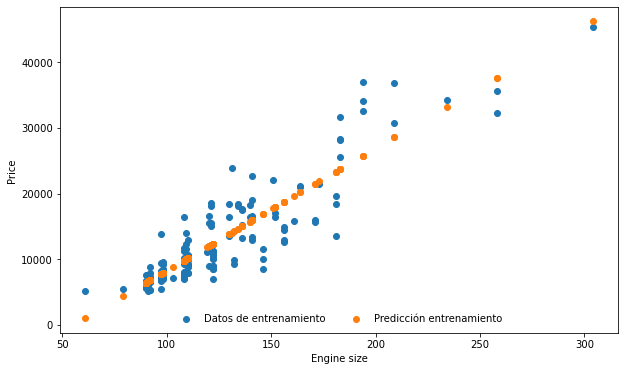

In [13]:
# Representación gráfica de la predicción
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X_train, y_train, label="Datos de entrenamiento")
ax.scatter(X_train, y_pred,  label="Predicción entrenamiento")

ax.set_xlabel(r'Engine size')
ax.set_ylabel(r'Price')
plt.legend(frameon=False, ncol=2, loc="lower center")
plt.show()

Más adelante se hablará con mayor detalle sobre las métricas, por ahora las utilizaremos sin dar mayores detalles.

In [14]:
# Métricas de la predicción
print(f"R2_train = {linear.score(X_train, y_train)}")
print(f"R2_test  = {linear.score(X_test, y_test)}")

R2_train = 0.8123324009408551
R2_test  = 0.7163191178271022


In [15]:
# Los coeficientes (parámetros del modelo) de la regresión lineal
print(f"m = {linear.coef_}")
print(f"b = {linear.intercept_}")

m = [[185.76252361]]
b = [-10272.70309861]


In [16]:
# Predicciones con el modelo
y_pred_test = linear.predict(X_test)
y_pred_test[:10]

array([[ 9975.41197445],
       [23350.31367409],
       [23350.31367409],
       [10161.17449806],
       [33195.72742522],
       [17963.20048952],
       [ 6817.44907315],
       [ 7746.26169118],
       [16848.62534788],
       [ 6445.92402594]])

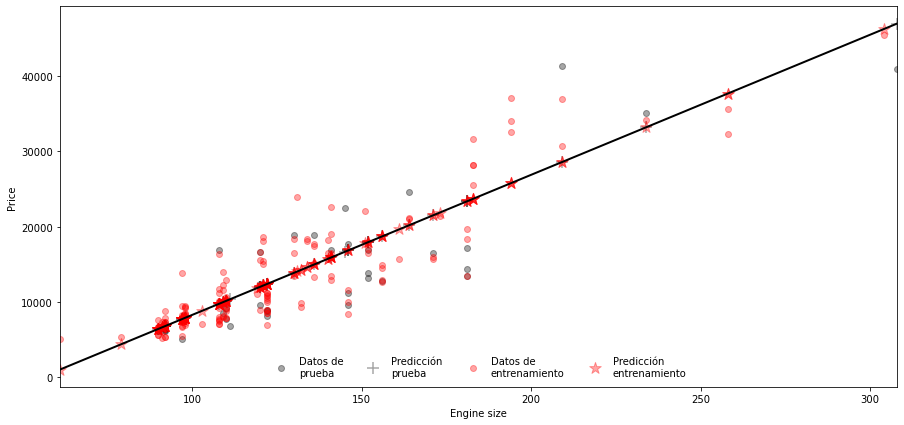

In [17]:
# Representación gráfica de la predicción + datos de prueba
fig, ax = plt.subplots(figsize=(15, 7))

ax.scatter(X_test,  y_test,      color='black', label=f'Datos de\nprueba',          marker="o", alpha=0.35)
ax.scatter(X_test,  y_pred_test, color='black', label=f'Predicción\nprueba',        marker="+", s=150, alpha=0.35)
ax.scatter(X_train, y_train,     color='red',   label=f'Datos de\nentrenamiento',   marker="o", alpha=0.35)
ax.scatter(X_train, y_pred,      color='red',   label=f'Predicción\nentrenamiento', marker="*", s=150, alpha=0.35)

x = np.linspace(min(X)[0], max(X)[0], 100)
ax.plot(x, (linear.coef_[0][0]*x + linear.intercept_[0]), color="k", linewidth=2)

ax.set_xlim( min((min(X_train),min(X_test))), max((max(X_train),max(X_test))) )
ax.set_xlabel(r'Engine size')
ax.set_ylabel(r'Price')
plt.legend(frameon=False, ncol=4, loc="lower center")
plt.show()

### Regresión multilineal

Habitualmente la variable target no depende linealmente de una única feature, es normalmente depende de varias, 2, 3 o más. Analicemos un ejemplo donde la variable target depende de dos features.

In [18]:
feature_1 = "engine_size"
feature_2 = "horsepower"

In [19]:
# 1.
# Separemos los datos en features y label
# Features
X = df[[feature_1, feature_2]]

# Label
y = df['price'].values.reshape(-1,1)

print(X.shape, y.shape)

(196, 2) (196, 1)


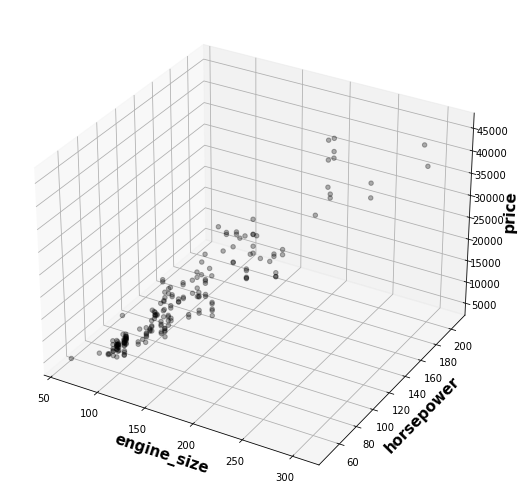

In [20]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(9,9))

ax.scatter3D(xs=X[feature_1], ys=X[feature_2], zs=y, color="black", alpha=0.3)

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}

ax.set_xlabel(feature_1, **font)
ax.set_ylabel(feature_2, **font)
ax.set_zlabel("price", **font)
#ax.set_title(f"price = a*{feature_1}+b*{feature_2}+c")
plt.show()

In [21]:
# 2.
# Datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 
# Estimador y predictor
linear_3D  = LinearRegression()

# 4. Entrenamiento/Estimación
linear_3D.fit(X_train, y_train)

LinearRegression()

In [22]:
print(f"modelo precio = a*{feature_1} + b*{feature_2} + c")
print(f"precio = {round(linear_3D.coef_[0][0],2)}*{feature_1} + " + 
               f"{round(linear_3D.coef_[0][1],2)}*{feature_2} + " +
               f"({round(linear_3D.intercept_[0],2)})")

# Algunas métricas
print(f"\nR2_train = {linear_3D.score(X_train, y_train)}")
print(f"R2_test  = {linear_3D.score(X_test, y_test)}")

modelo precio = a*engine_size + b*horsepower + c
precio = 145.81*engine_size + 43.09*horsepower + (-9818.64)

R2_train = 0.8177688181233371
R2_test  = 0.7712752434248481


In [23]:
# Predictor
# Luego se pueden realizar predicciones
# Predicción para los datos de entrenamiento
y_pred_tr = linear_3D.predict(X_train)

# Predicción para los datos de testing
y_pred_tt = linear_3D.predict(X_test)

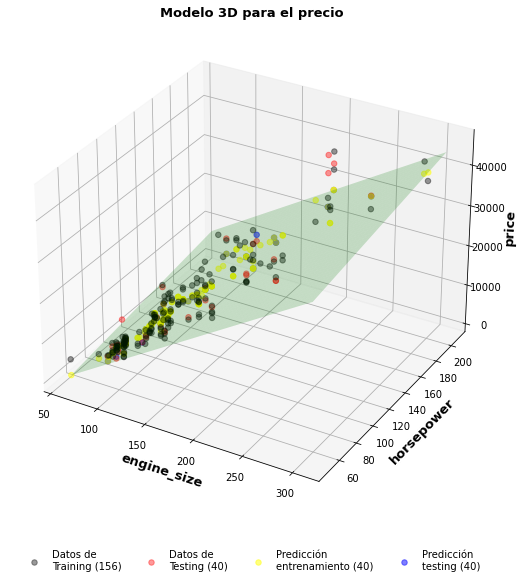

In [24]:
# Representación gráfica de los resultados del modelo
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(9,9))

# training
ax.scatter3D(xs=X_train[feature_1], ys=X_train[feature_2], zs=y_train,
             label=f"Datos de\nTraining ({len(y_train)})", color="black", alpha=0.4, s=30)

# testing
ax.scatter3D(xs=X_test[feature_1], ys=X_test[feature_2], zs=y_test,
             label=f"Datos de\nTesting ({len(y_test)})", color="red", alpha=0.4, s=30)

# prediccines entrenamiento
ax.scatter3D(xs=X_train[feature_1], ys=X_train[feature_2], zs=y_pred_tr,
             label=f"Predicción\nentrenamiento ({len(y_test)})", color="yellow", alpha=0.5, s=30)

# prediccines testing
ax.scatter3D(xs=X_test[feature_1], ys=X_test[feature_2], zs=y_pred_tt,
             label=f"Predicción\ntesting ({len(y_test)})", color="blue", alpha=0.5, s=30)

# Modelo
xs = np.linspace(df[feature_1].min(), df[feature_1].max(), 100)
ys = np.linspace(df[feature_2].min(), df[feature_2].max(), 100)
xs, ys = np.meshgrid(xs, ys)
zs = linear_3D.coef_[0][0]*xs + linear_3D.coef_[0][1]*ys + linear_3D.intercept_
ax.plot_surface(X=xs, Y=ys, Z=zs, color="green", alpha=0.2)

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 13}

ax.set_xlabel(feature_1, **font)
ax.set_ylabel(feature_2, **font)
ax.set_zlabel("price", **font)
ax.set_title("Modelo 3D para el precio", **font)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.14), ncol=4, frameon=False)

#ax.set_title(f"price = a*{feature_1}+b*{feature_2}+c")
plt.show()

## <code>Ridge</code>

Ridge hace parte de los métodos de regularización. Estos buscan penalizar los coeficientes $w_i$ del modelo con el fin de controlar su valor impidiendo que crescan demasiado y, en algunos casos, volviéndolos nulos, esto último característica propia de la regresión de Lasso que veremos más adelante. El objetivo de la regresión de Ridge es minimizar la función de costo,  

\begin{equation}
   \text{Min}  \sum_{i=1}^n (X_i\cdot w - y_i)^2 + \alpha ||w||^2
\end{equation}

que se puede ver como compuesta por dos partes; un OLS más una penalización a los coeficientes dada por la expresión $\alpha ||w||^2$. Al adherir esta última componente se busca que los valores de los $w_i$ no crescan desproporcionalmente. $\alpha \geq 0$ es conocido como el **parámetro de complejidad** y su valor determina la magnitud de la regularización, un mayor valor de este implica una mayor regularización pues los coeficientes del modelo tendrán que disminuir su valor para poder compensar el alza en la función de costo. 

Como se puede ver, el termino que induce la regularización $\alpha ||w||^2$ implica una suma de los cuadrados de los coeficientes del modelo, esto tiene una implicación sobre la naturaleza de los datos con los cuales se realiza el entrenamiento: se deben normalizar o escalar previamente principalmente por dos razones. Imaginemos que tenemos un modelo para predecir el precio de un coche utilizando como features el tamaño del motor en $cm^3$ y el número de cilíndros que este tiene (magnitud adimensional), mientras la primera variable puede tener valores que abarquen un gran rango la segunda estará mucho más limitada (entre $4$ y $8$ para la base de datos que estamos trabajando) y por tanto el tamaño del motor tendrá un mayor impacto sobre el precio del coche dejando quizá muy poco protagonismo al número de cilíndros, lo cual no es un comportamiento esperado, esta es la primera razón por la que es necesario que todas las features que se utilicen para el modelo estén escaladas a un determinado rango. La segunda razón es un poco más obvia, dimensionalmente no es correcto sumar cantidades de diferente naturaleza, no podemos sumar peras con manzanas. En el [link]("https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29") hay una discusión interesante al respecto. 

A continuación un ejemplo de aplicación de Ridge.

#### <code>Ridge</code> sin estandarización de las features

In [25]:
df.num_of_cylinders.unique(), df.num_of_doors.unique()

(array(['four', 'six', 'five', 'three', 'eight'], dtype=object),
 array(['two', 'four'], dtype=object))

In [26]:
def name_to_number(x):
    if x=="two":   return 2
    if x=="three": return 3
    if x=="four":  return 4
    if x=="five":  return 5
    if x=="six":   return 6
    if x=="eight": return 8
    if x=="twelve": return 12
    else: return x #sólo para evitar errores si se corre varias veces
    
df[["num_of_cylinders", "num_of_doors"]] = df[["num_of_cylinders", "num_of_doors"]].map(name_to_number)

In [27]:
df.num_of_cylinders.unique(), df.num_of_doors.unique()

(array([4, 6, 5, 3, 8]), array([2, 4]))

In [28]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'city_L_100km', 'horsepower_binned', 'diesel', 'gas'],
      dtype='object')

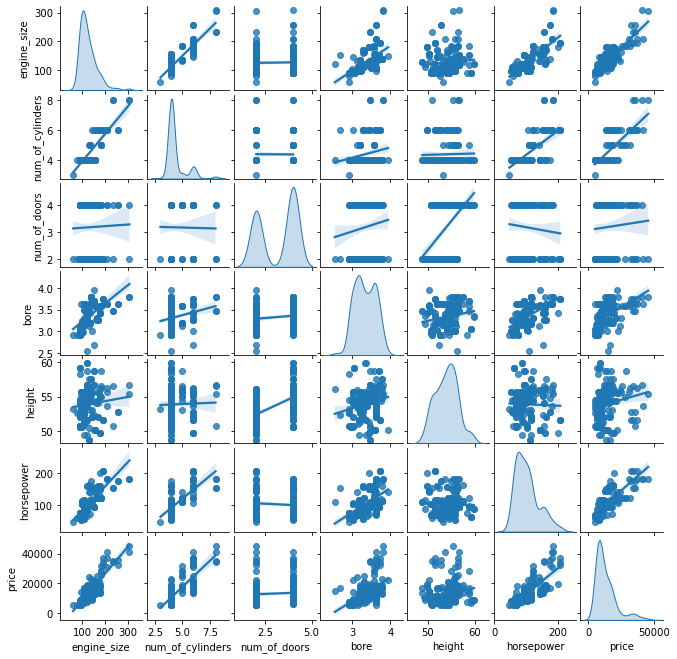

In [29]:
# Features para el modelo
sel_features = ["engine_size", "num_of_cylinders", "num_of_doors", "bore", "height", "horsepower"]
target = "price"

X = df[sel_features]
y = df[target]

# pairplot
fig = sbn.pairplot(pd.concat([X,y], axis=1), kind="reg", diag_kind="kde")
fig.fig.set_size_inches(9,9)
plt.show()

In [30]:
pd.concat([X,y], axis=1).corr()

,engine_size,num_of_cylinders,num_of_doors,bore,height,horsepower,price
engine_size,1.000000,0.835121,0.023694,0.601384,0.100518,0.825377,0.889265
num_of_cylinders,0.835121,1.000000,-0.010059,0.218225,0.025258,0.686904,0.771588
num_of_doors,0.023694,-0.010059,1.000000,0.126117,0.515880,-0.079041,0.061182
bore,0.601384,0.218225,0.126117,1.000000,0.199490,0.579114,0.544375
height,0.100518,0.025258,0.515880,0.199490,1.000000,-0.031489,0.182407
horsepower,0.825377,0.686904,-0.079041,0.579114,-0.031489,1.000000,0.802040
price,0.889265,0.771588,0.061182,0.544375,0.182407,0.802040,1.000000


In [31]:
# Datos de entrenamiento y prueba/testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

######################## Ridge ########################

# Antes de entrenar el modelo se escoge el mejor valor de alpha.
# En el siguiente módulo se explicará en detalle este procedimiento
# de ajuste de los hiperparámetros de un modelo.
best_alpha = RidgeCV(alphas=np.linspace(0.01, 5000, 1000)).fit(X_train, y_train).alpha_

# Entrenamiento
model_ridge = Ridge(alpha=best_alpha)
model_ridge.fit(X=X_train, y=y_train)

Ridge(alpha=205.21479479479478)

In [32]:
######################## Linear ########################

# Con el fin de comparar, veamos qué resultado se obtendría
# utilizando una regresión lineal simple

# Entrenamiento
model_linear = LinearRegression().fit(X=X_train, y=y_train)
model_linear

LinearRegression()

In [33]:
# Métricas de la predicción
print("Modelo con regularización")
print(f"R2_train = {model_ridge.score(X_train, y_train)}")
print(f"R2_test  = {model_ridge.score(X_test, y_test)}\n")

# Métricas de la predicción
print("Modelo sin regularización")
print(f"R2_train = {model_linear.score(X_train, y_train)}")
print(f"R2_test  = {model_linear.score(X_test, y_test)}")

Modelo con regularización
R2_train = 0.8262427071071782
R2_test  = 0.6018574966145052

Modelo sin regularización
R2_train = 0.8288155214824066
R2_test  = 0.6288483350489247


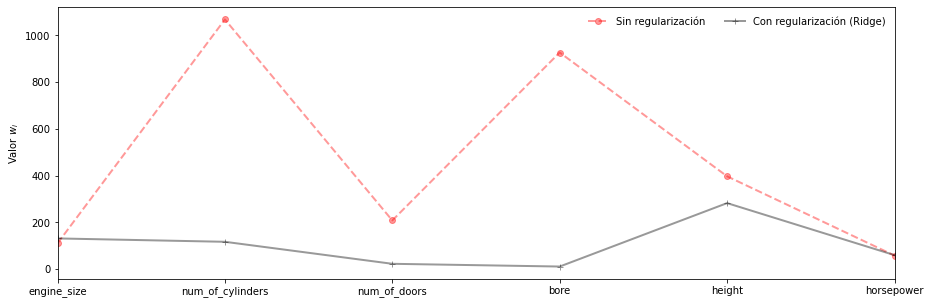

In [34]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(abs(model_linear.coef_), label="Sin regularización",          
                                 color="red", marker="o", linestyle="--", linewidth=2, alpha=0.4)
ax.plot(abs(model_ridge.coef_),  label="Con regularización (Ridge)",
                                 color="k",   marker="+", linestyle="-",  linewidth=2, alpha=0.4)

ax.set_xticks(ticks=range(len(sel_features)), labels=sel_features, rotation=0)
ax.set_ylabel(r"Valor $w_i$")
ax.set_xlim(0, len(sel_features)-1)
ax.legend(frameon=False, ncol=2)
plt.show()

Como se puede ver, el modelo sin regularización produce mayoritariamente coeficientes de mayor valor además de tener una mayor variación.

In [35]:
model_linear.coef_.std(), model_ridge.coef_.std()

(464.54113574316347, 103.01292934242105)

Un análisis interesante sería ver el valor de los coeficientes para compararlos entre ellos y ver cuál de todos tiene mayor impacto sobre el precio del carro. 

In [36]:
coefs_df = pd.DataFrame({"w_ridge":model_ridge.coef_, "w_linear":model_linear.coef_},
                        index=sel_features).sort_values(by="w_ridge", ascending=False)
coefs_df

,w_ridge,w_linear
height,282.870838,397.466923
engine_size,131.830972,110.818601
num_of_cylinders,117.402357,1068.375810
horsepower,60.439337,58.631537
bore,-11.572583,926.961705
num_of_doors,-23.276054,-208.745803


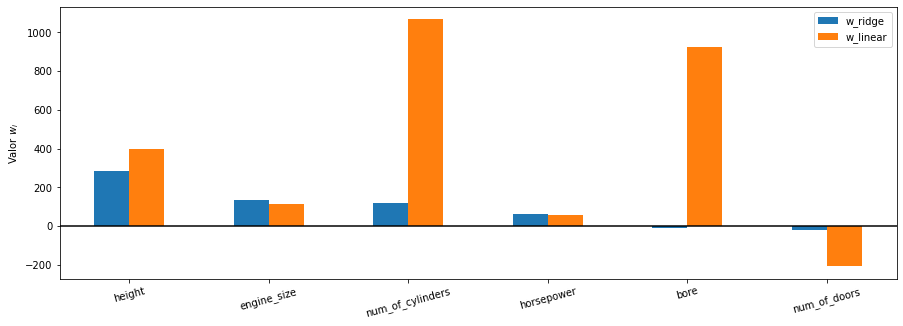

In [37]:
fig, ax = plt.subplots(figsize=(15,5))

coefs_df.plot.bar(ax=ax)
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], color="k")

ax.set_xticks(ticks=range(len(sel_features)), labels=coefs_df.index, rotation=15)
ax.set_ylabel(r"Valor $w_i$")
plt.show()

Anteriormente, tanto al ver las correlaciones como en el pairplot, se pudo concluir que una de las variables de mayor impacto para predecir el valor del carro es $engine\_size$ al igual que $num\_of\_cylinders$ y $horsepower$. Sin embargo, el gráfico muestra todo lo contrario a este comportamiento esperado y esto se debe a que falta un paso fundamental para poder generar un buen modelo, la estandarización de los datos con los que se está trabajando. 

#### <code>Ridge</code> con estandarización de las features

Antes de entrenar el modelo es menester realizar una estandarización de los datos pues estos no contienen las mismas unidades y sus rangos son bastante diferentes. Este proceso se puede realizar con ayuda de <code>StandardScaler</code>.

In [38]:
best_alpha_std = RidgeCV(alphas=np.linspace(0.01, 50, 1000))\
                                    .fit(
                                        X=StandardScaler().fit_transform(X_train),
                                        y=y_train)\
                                    .alpha_

# Ridge estandarizado
model_ridge_std = Pipeline(steps=[
                                ("Estandarización", StandardScaler()),
                                ("Regularización", Ridge(alpha=best_alpha_std))
                                ])

# Lineal estandarizado
model_linear_std = Pipeline(steps=[
                                ("Estandarización", StandardScaler()),
                                ("Lineal", LinearRegression())
                                ]).fit(X=X_train, y=y_train)

model_ridge_std.fit(X_train, y_train)

Pipeline(steps=[('Estandarización', StandardScaler()),
                ('Regularización', Ridge(alpha=3.0124024024024023))])

In [39]:
model_ridge_std.get_params()["Regularización"].coef_ < model_linear_std.get_params()["Lineal"].coef_

array([ True, False, False, False,  True, False])

In [40]:
# Métricas de la predicción
print("Modelo con regularización")
print(f"R2_train = {model_ridge_std.score(X_train, y_train)}")
print(f"R2_test  = {model_ridge_std.score(X_test, y_test)}\n")

Modelo con regularización
R2_train = 0.8284247757270191
R2_test  = 0.630090581302724



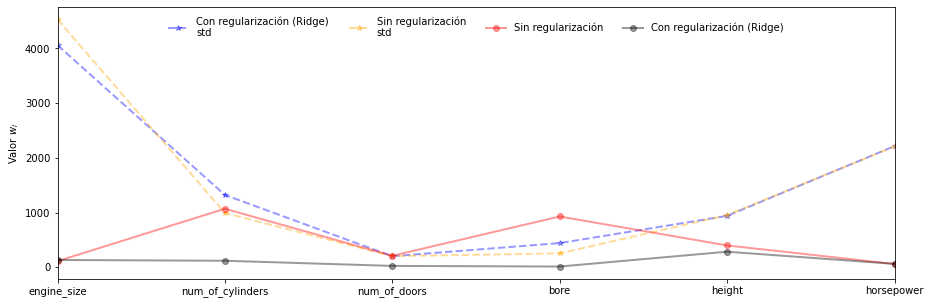

In [41]:
fig, ax = plt.subplots(figsize=(15,5))
# Modelos con estandarización
ax.plot(abs(model_ridge_std.get_params()["Regularización"].coef_),  
                                 label="Con regularización (Ridge)\nstd",
                                 color="blue",   marker="*", linestyle="--",  linewidth=2, alpha=0.4)

ax.plot(abs(model_linear_std.get_params()["Lineal"].coef_),  
                                 label="Sin regularización\nstd",
                                 color="orange",   marker="*", linestyle="--",  linewidth=2, alpha=0.4)

# Modelos sin estandarización
ax.plot(abs(model_linear.coef_), label="Sin regularización",          
                                 color="red", marker="o", linestyle="-", linewidth=2, alpha=0.4)

ax.plot(abs(model_ridge.coef_),  label="Con regularización (Ridge)",
                                 color="k",   marker="o", linestyle="-", linewidth=2, alpha=0.4)


ax.set_xticks(ticks=range(len(sel_features)), labels=sel_features, rotation=0)
ax.set_ylabel(r"Valor $w_i$")
ax.set_xlim(0, len(sel_features)-1)
ax.legend(frameon=False, ncol=4, loc="upper center")
plt.show()

Escribir una conclusión sobre este gráfico.

Al igual que hicimos anteriormente, realicemos un análisis de los coeficientes obtenidos para los modelos.

In [42]:
coefs_std_df = pd.DataFrame({"w_ridge_std":model_ridge_std.get_params()["Regularización"].coef_,
                             "w_linear_std":model_linear_std.get_params()["Lineal"].coef_},
                            index=sel_features).sort_values(by="w_ridge_std", ascending=False)
coefs_std_df

,w_ridge_std,w_linear_std
engine_size,4060.565407,4531.203567
horsepower,2214.075747,2207.518044
num_of_cylinders,1320.578478,991.505408
height,937.617363,952.090815
bore,440.449650,252.167308
num_of_doors,-200.515857,-202.458037


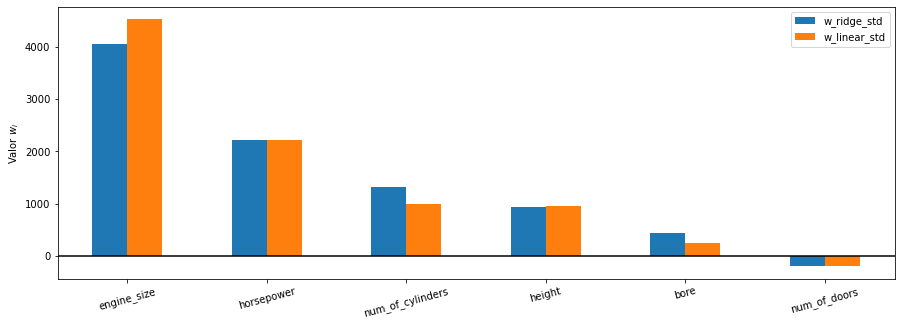

In [43]:
fig, ax = plt.subplots(figsize=(15,5))
coefs_std_df.plot.bar(ax=ax)
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], color="k")

ax.set_xticks(ticks=range(len(coefs_std_df.index)), labels=coefs_std_df.index, rotation=15)
ax.set_ylabel(r"Valor $w_i$")
plt.show()

Este es un comportamiento mucho más acorde a lo analizado inicialmente a partir de las correlaciones y gráficos. 

#### Efectos del hiperparámetro $\alpha$

Analicemos ahora cómo afecta el hiperparámetro $\alpha$ el valor de los coeficientes.

In [44]:
alphas = np.logspace(-2, 5, 200)
coefs  = []

# Para cada valor de alpha se obtienen los valores de los coeficientes
for alpha in alphas:
    model_alpha = Pipeline(
                        [("ss", StandardScaler()),
                         ("ridge", Ridge(alpha=alpha))]
                        ).fit(X=X_train, y=y_train)
    coefs.append(
                model_alpha.get_params()["ridge"].coef_
    )

coefs = np.array(coefs)
coefs.shape

(200, 6)

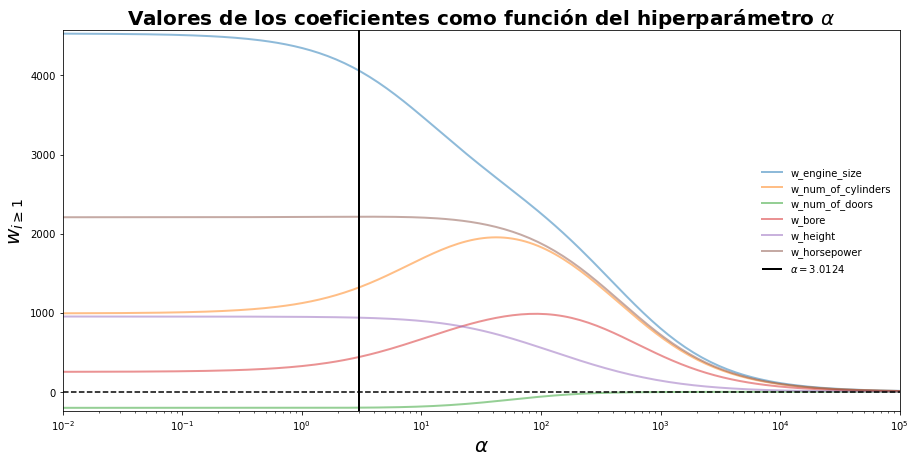

In [45]:
# Plot
fig, ax = plt.subplots(figsize=(15,7))

i = 0
for coef in coefs.T:
    ax.plot(alphas, coef, label=f"w_{sel_features[i]}", linewidth=2, alpha=0.5)
    i += 1
    
ax.set_xlim(min(alphas), max(alphas))
ax.set_ylim(min(coefs.flatten())-40, max(coefs.flatten())+40)
ax.vlines(x=model_ridge_std.get_params()["Regularización__alpha"],
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],
          color="k", linewidth=2, alpha=1,
          label=r"$\alpha=%.4f$"%model_ridge_std.get_params()["Regularización__alpha"])

ax.hlines(y=0, xmin=min(alphas), xmax=max(alphas), color="k", alpha=1, linewidth=1.5, linestyle="--")

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 20}
ax.set_xlabel(r"$\alpha$", **font)
ax.set_ylabel(r"$w_{i\geq 1}$", **font)
ax.set_xscale("log")
ax.set_title(r"Valores de los coeficientes como función del hiperparámetro $\alpha$", **font)
plt.legend(frameon=False, ncol=1, loc="center right")
plt.show()

Como es notorio a partir del gráfico, las magnitudes de los coeficientes del modelo tienden a disminuir a medida que aumenta el parámetro de complejidad $\alpha$. Este es el efecto deseado con la regularización, al incrementar el valor de $\alpha$ se debe obtener una disminución en las magnitudes de los coeficientes pues estos se ven forzados a reducir su valor con el fin de minimizar la función de costo. 

## <code>Lasso</code>

Lasso es uno de los modelos con regularización y, como se dijo anteriormente, estos buscan penalizar los coeficientes $w_i$ con el fin de controlar su valor impidiendo que crescan demasiado. Lasso, en particular, sanciona con mayor fuerza los coeficientes pudiendo incluso volverlos nulos de manera que elimina la contribución de las respectivas features a nuestro target. Gracias a este comportamiento es ampliamente utilizado cuando el objetivo es reducir la dimensionalidad del conjunto de datos. Lasso consiste en minimizar la función de costo:  

\begin{equation}
   \text{Min } \frac{1}{2n} \sum_{i=1}^n (X_i\cdot w - y_i)^2 + \alpha ||w||
\end{equation}

que se puede ver como compuesta por dos partes; un OLS más una penalización a los coeficientes dada por la expresión $\alpha ||w||$. En contraste con Ridge, esta penalización permite realizar mayores restricciones sobre los coeficientes del modelo. Al igual que antes, el valor de $\alpha$ determina la magnitud de la regularización. En el argot se dice entonces que Lasso produce una regularización de tipo $L1$ mientras que Ridge una de tipo $L2$.

A continuación un ejemplo de aplicación de Lasso.

In [46]:
######################## Lasso ########################
# Antes de entrenar el modelo se escoge el mejor valor de alpha para Lasso.
best_alphaL = Pipeline([("Std", StandardScaler()),
                        ("LassoCV", LassoCV(alphas=np.linspace(1e-10, 1, 5000), ))])\
                                        .fit(X=X_train,
                                             y=y_train).get_params()["LassoCV"].alpha_

print(f"alfa Lasso = {best_alphaL}")

# Entrenamiento
model_lasso_std = Pipeline([
                        ("Std", StandardScaler()),
                        ("Lasso", Lasso(alpha=best_alphaL))
                        ])\
                        .fit(X=X_train, y=y_train)
model_lasso_std

alfa Lasso = 1e-10


Pipeline(steps=[('Std', StandardScaler()), ('Lasso', Lasso(alpha=1e-10))])

In [47]:
# Métricas de la predicción
print("Modelo con regularización (Lasso)")
print(f"R2_train = {model_lasso_std.score(X_train, y_train)}")
print(f"R2_test  = {model_lasso_std.score(X_test, y_test)}")

Modelo con regularización (Lasso)
R2_train = 0.8288155214824066
R2_test  = 0.6288483350489324


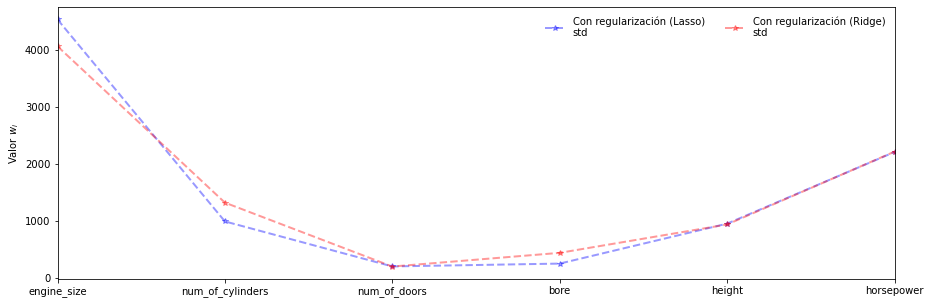

In [48]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(abs(model_lasso_std.get_params()["Lasso"].coef_),  
                                 label="Con regularización (Lasso)\nstd",
                                 color="blue",   marker="*", linestyle="--",  linewidth=2, alpha=0.4)

ax.plot(abs(model_ridge_std.get_params()["Regularización"].coef_),  
                                 label="Con regularización (Ridge)\nstd",
                                 color="red",   marker="*", linestyle="--",  linewidth=2, alpha=0.4)

ax.set_xticks(ticks=range(len(sel_features)), labels=sel_features, rotation=0)
ax.set_ylabel(r"Valor $w_i$")
ax.set_xlim(0, len(sel_features)-1)
ax.legend(frameon=False, ncol=3)
plt.show()

In [49]:
model_linear_std.get_params()["Lineal"].coef_

array([4531.20356692,  991.50540774, -202.45803727,  252.16730775,
        952.09081546, 2207.51804372])

In [50]:
model_lasso_std.get_params()["Lasso"].coef_

array([4531.20356692,  991.50540774, -202.45803727,  252.16730775,
        952.09081546, 2207.51804372])

In [51]:
coefs_std_Lasso_df = pd.DataFrame({"w_lasso_std":model_lasso_std.get_params()["Lasso"].coef_,
                             "w_linear_std":model_linear_std.get_params()["Lineal"].coef_},
                            index=sel_features).sort_values(by="w_lasso_std", ascending=False)
coefs_std_Lasso_df

,w_lasso_std,w_linear_std
engine_size,4531.203567,4531.203567
horsepower,2207.518044,2207.518044
num_of_cylinders,991.505408,991.505408
height,952.090815,952.090815
bore,252.167308,252.167308
num_of_doors,-202.458037,-202.458037


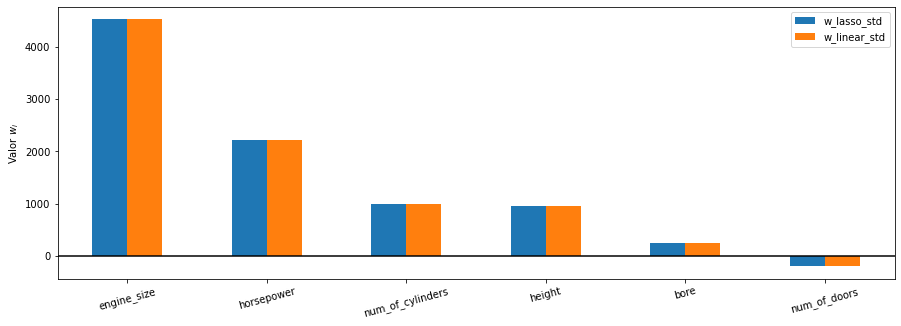

In [52]:
fig, ax = plt.subplots(figsize=(15,5))
coefs_std_Lasso_df.plot.bar(ax=ax)
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], color="k")

ax.set_xticks(ticks=range(len(coefs_std_Lasso_df.index)), labels=coefs_std_Lasso_df.index, rotation=15)
ax.set_ylabel(r"Valor $w_i$")
plt.show()

Una de los principales atractivos de Lasso es la eliminación del aporte de features altamente correlacionadas o de aquellas que no contribuyen considerablemente al modelo. Para ver esto adhiramos una feature que sea un múltiplo de otra ($num\_of\_cylinders$) y otra que represente un poco de ruido.

In [53]:
X

,engine_size,num_of_cylinders,num_of_doors,bore,height,horsepower
0,130,4,2,3.47,48.8,111.0
1,130,4,2,3.47,48.8,111.0
2,152,6,2,2.68,52.4,154.0
3,109,4,4,3.19,54.3,102.0
4,136,5,4,3.19,54.3,115.0
...,...,...,...,...,...,...
191,141,4,4,3.78,55.5,114.0
192,141,4,4,3.78,55.5,160.0
193,173,6,4,3.58,55.5,134.0
194,145,6,4,3.01,55.5,106.0


In [54]:
np.random.seed(42)
X.loc[:,"new_feature1"] = 2*X["num_of_cylinders"] - 0.01*np.random.normal(size=X.shape[0])
X.loc[:,"new_feature2"] = np.random.normal(size=X.shape[0])
X

/tmp/ipykernel_9826/1526350335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,"new_feature1"] = 2*X["num_of_cylinders"] - 0.01*np.random.normal(size=X.shape[0])
/tmp/ipykernel_9826/1526350335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,"new_feature2"] = np.random.normal(size=X.shape[0])


,engine_size,num_of_cylinders,num_of_doors,bore,height,horsepower,new_feature1,new_feature2
0,130,4,2,3.47,48.8,111.0,7.995033,-0.883857
1,130,4,2,3.47,48.8,111.0,8.001383,0.153725
2,152,6,2,2.68,52.4,154.0,11.993523,0.058209
3,109,4,4,3.19,54.3,102.0,7.984770,-1.142970
4,136,5,4,3.19,54.3,115.0,10.002342,0.357787
...,...,...,...,...,...,...,...,...
191,141,4,4,3.78,55.5,114.0,7.991436,1.876171
192,141,4,4,3.78,55.5,160.0,7.997859,0.950424
193,173,6,4,3.58,55.5,134.0,12.012457,-0.576904
194,145,6,4,3.01,55.5,106.0,11.998268,-0.898415


In [55]:
pd.concat([X,y], axis=1).corr()

,engine_size,num_of_cylinders,num_of_doors,bore,height,horsepower,new_feature1,new_feature2,price
engine_size,1.000000,0.835121,0.023694,0.601384,0.100518,0.825377,0.835192,-0.023404,0.889265
num_of_cylinders,0.835121,1.000000,-0.010059,0.218225,0.025258,0.686904,0.999985,-0.013252,0.771588
num_of_doors,0.023694,-0.010059,1.000000,0.126117,0.515880,-0.079041,-0.009597,0.040481,0.061182
bore,0.601384,0.218225,0.126117,1.000000,0.199490,0.579114,0.218668,-0.005217,0.544375
height,0.100518,0.025258,0.515880,0.199490,1.000000,-0.031489,0.025194,0.043845,0.182407
horsepower,0.825377,0.686904,-0.079041,0.579114,-0.031489,1.000000,0.687064,0.023684,0.802040
new_feature1,0.835192,0.999985,-0.009597,0.218668,0.025194,0.687064,1.000000,-0.012128,0.771499
new_feature2,-0.023404,-0.013252,0.040481,-0.005217,0.043845,0.023684,-0.012128,1.000000,0.019729
price,0.889265,0.771588,0.061182,0.544375,0.182407,0.802040,0.771499,0.019729,1.000000


In [56]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=13)

best_alphaL2 = Pipeline([("Std", StandardScaler()),
                        ("LassoCV", LassoCV(
                                            alphas=np.linspace(0.01, 500, 5000),
                                            max_iter=int(1e6)))])\
                                    .fit(X=X_train_2,
                                         y=y_train_2)\
                                    .get_params()["LassoCV"].alpha_

print(f"Mejor alfa Lasso = {best_alphaL2}")

# Entrenamiento
model_lasso_std_2 = Pipeline([
                        ("Std", StandardScaler()),
                        ("Lasso", Lasso(alpha=best_alphaL2))
                        ])\
                        .fit(X=X_train_2, y=y_train_2)
model_lasso_std_2

Mejor alfa Lasso = 107.12928185637128


Pipeline(steps=[('Std', StandardScaler()),
                ('Lasso', Lasso(alpha=107.12928185637128))])

In [57]:
coefs_std_Lasso_df_2 = pd.DataFrame({"w_lasso_std":model_lasso_std_2.get_params()["Lasso"].coef_}, 
                                   index=X_train_2.columns).sort_values(by="w_lasso_std", ascending=False)
coefs_std_Lasso_df_2

,w_lasso_std
engine_size,4661.192216
horsepower,1916.882546
height,883.284048
num_of_cylinders,535.362034
num_of_doors,24.707920
bore,0.000000
new_feature1,0.000000
new_feature2,-0.000000


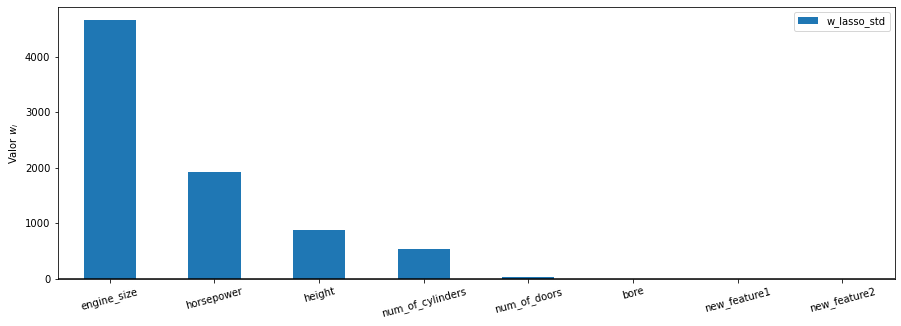

In [58]:
fig, ax = plt.subplots(figsize=(15,5))
coefs_std_Lasso_df_2.plot.bar(ax=ax)
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], color="k")

ax.set_xticks(ticks=range(len(coefs_std_Lasso_df_2.index)), labels=coefs_std_Lasso_df_2.index, rotation=15)
ax.set_ylabel(r"Valor $w_i$")
plt.show()

Como se puede ver, Lasso anula la contribución de las features que menos contribuyen al modelo y de aquellas que tienen alta correlación con otras. Este último aspecto es de bastante relevancia pues la existencia de features correlacionadas puede afectar considerablemente el valor de los coeficientes el modelo tornandolos inestables, especialmente de aquellos correspondientes a las features correlacionadas. 

#### Efectos del hiperparámetro $\alpha$ con Lasso

Al igual que hicimos con Ridge, analicemos ahora cómo afecta el hiperparámetro $\alpha$ el valor de los coeficientes con Lasso.

In [59]:
alphas = np.logspace(0, 5, 200)
coefs  = []

# Para cada valor de alpha se obtienen los valores de los coeficientes
for alpha in alphas:
    model_alpha = Pipeline(
                        [("ss", StandardScaler()),
                         ("lasso", Lasso(alpha=alpha, max_iter=int(1e6)))]
                        ).fit(X=X_train_2, y=y_train_2)
    coefs.append(
                model_alpha.get_params()["lasso"].coef_
                )

coefs = np.array(coefs)
coefs.shape

(200, 8)

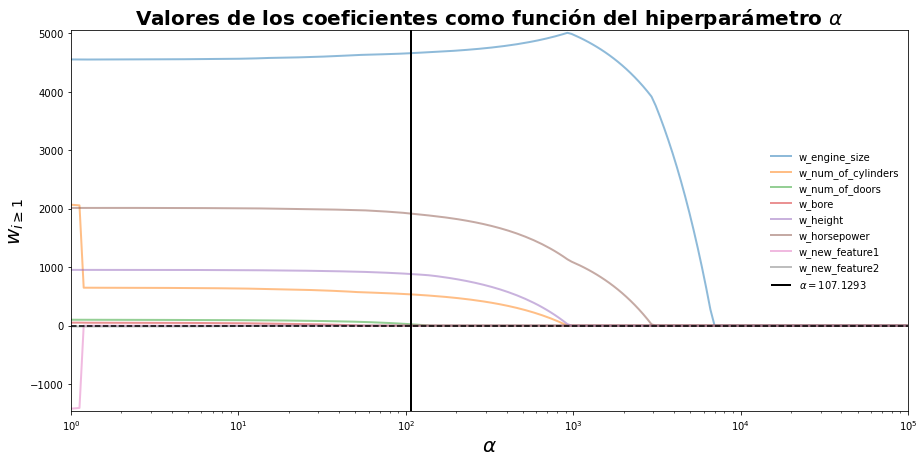

In [60]:
# Plot
fig, ax = plt.subplots(figsize=(15,7))

i = 0
for coef in coefs.T:
    ax.plot(alphas, coef, label=f"w_{X_train_2.columns[i]}", linewidth=2, alpha=0.5)
    i += 1
    
ax.set_xlim(min(alphas), max(alphas))
ax.set_ylim(min(coefs.flatten())-40, max(coefs.flatten())+40)
ax.vlines(x=best_alphaL2,
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],
          color="k", linewidth=2, alpha=1,
          label=r"$\alpha=%.4f$"%best_alphaL2)

ax.hlines(y=0, xmin=min(alphas), xmax=max(alphas), color="k", alpha=1, linewidth=1.5, linestyle="--")

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 20}
ax.set_xlabel(r"$\alpha$", **font)
ax.set_ylabel(r"$w_{i\geq 1}$", **font)
ax.set_xscale("log")
ax.set_title(r"Valores de los coeficientes como función del hiperparámetro $\alpha$", **font)
plt.legend(frameon=False, ncol=1, loc="center right")
plt.show()

Es interesante realizar una comparación entre este gráfico y el mismo realizado para Ridge. La primera característica relevante es la eliminación total de la contribución de varias features (cerca de $\alpha\approx 10^2$), si bien Ridge tiende a eliminarlas no lo hace totalmente, solo hace que el valor de los pesos se acerque asintóticamente a cero. Las features de menor relevancia (para el target) o de mayor correlación (entre ellas) son las primeras en desaparecer. Eventualmente, si la regularización se hace demasiado fuerte, la contribución de todas las features tenderá a desaparecer, como es de esperar.   

## <code>ElasticNet</code>

Las redes elásticas se pueden pensar como una combinación de Lasso (L1) y Ridge (L2). Esta combinación tiene amplias ventajas pues permite heredar las características más valiosas de ambas técnicas como la posibilidad de eliminar las carácterísticas correlacionadas manteniendo una regularización sobre los coeficientes del modelo. La función de costo para este problema es

\begin{equation}
   \text{Min } \frac{1}{2n} \sum_{i=1}^n (X_i\cdot w - y_i)^2 + \alpha\rho ||w|| + \frac{\alpha(1-\rho)}{2}||w||^2
\end{equation}

En caso de tener $\rho=$<code>l1_ratio</code>$=1$ se obtiene Lasso, con <code>l1_ratio</code>$=0$ obtenemos Ridge. De la expresión de arriba se deduce $0\leq$<code>l1_ratio</code>$\leq 1$ .  Veamos un ejemplo.

In [61]:
######################## ElasticNet ########################
# Antes de entrenar el modelo se escogen los mejores valores de los hiperparámetros alpha y l1_ratio.
best_paramsEN = Pipeline([("Std", StandardScaler()),
                          ("ElasticNetCV", ElasticNetCV(l1_ratio=np.linspace(1e-4, 1, 500),
                                                        alphas=np.linspace(1, 30, 100),
                                                        max_iter=int(1e6)))
                        ])\
                        .fit(X=X_train_2,
                         y=y_train_2)

best_alphaEN = best_paramsEN.get_params()["ElasticNetCV"].alpha_
best_l1EN    = best_paramsEN.get_params()["ElasticNetCV"].l1_ratio_
print(f"Mejor alpha = {best_alphaEN}\nMejor l1_ratio = {best_l1EN}")

# Entrenamiento
model_EN_std = Pipeline([
                        ("Std", StandardScaler()),
                        ("EN", ElasticNet(alpha=best_alphaEN, l1_ratio=best_l1EN))
                        ])\
                        .fit(X=X_train_2, y=y_train_2)

model_EN_std

Mejor alpha = 22.96969696969697
Mejor l1_ratio = 0.9979961923847696


Pipeline(steps=[('Std', StandardScaler()),
                ('EN',
                 ElasticNet(alpha=22.96969696969697,
                            l1_ratio=0.9979961923847696))])

In [62]:
# Métricas de la predicción
print("Modelo con regularización (Lasso)")
print(f"R2_train = {model_EN_std.score(X_train_2, y_train_2)}")
print(f"R2_test  = {model_EN_std.score(X_test_2, y_test_2)}")

Modelo con regularización (Lasso)
R2_train = 0.842534651169403
R2_test  = 0.7608022569811449


In [63]:
coefs_std_EN_df = pd.DataFrame({"w_EN_std":model_EN_std.get_params()["EN"].coef_},
                            index=X_train_2.columns).sort_values(by="w_EN_std", ascending=False)
coefs_std_EN_df

,w_EN_std
engine_size,3584.239019
horsepower,1989.367480
height,898.608356
num_of_cylinders,680.432163
new_feature1,637.367849
bore,465.896675
num_of_doors,74.072018
new_feature2,-21.148209


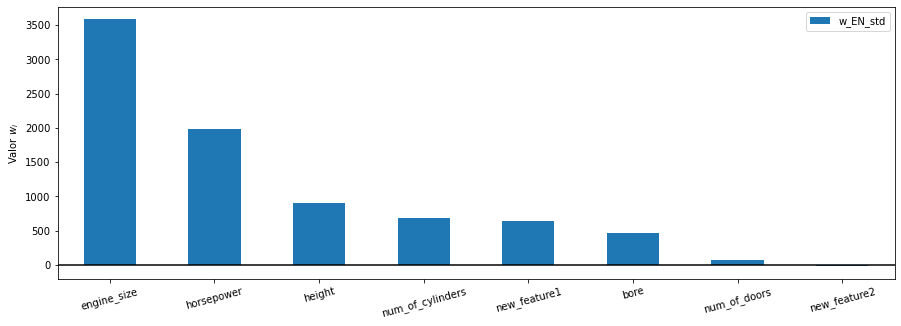

In [64]:
fig, ax = plt.subplots(figsize=(15,5))
coefs_std_EN_df.plot.bar(ax=ax)
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], color="k")

ax.set_xticks(ticks=range(len(coefs_std_EN_df.index)), labels=coefs_std_EN_df.index, rotation=15)
ax.set_ylabel(r"Valor $w_i$")
plt.show()

En este gráfico se puede ver la naturaleza de las redes elásticas actuando. Se eliminan dos de las features que fueron eliminadas por Lasso pero $new\_feature1$ sobrevive pues representa una alta correlación con el modelo.

## <code>Lasso</code> vs <code>Ridge</code> vs <code>ElasticNet</code>

Llegados a este punto una duda seguramente ha surgido, ¿cuándo debemos utilizar cada uno de los métodos de regularizacón? La respuesta a tan interesante inquietud viene, como sería de esperar, de los datos y del conocimiento que tengamos sobre ellos y del modelo que queramos generar. 

   - Como primera regla, se aconseja el uso de estos métodos siempre y cuando la cantidad de muestras de
     entrenamiento sea inferior a $10^4$ (para problemas de regresión), como se puede leer en la
     documentación de Sklearn para aplicación de modelos de 
     [regresión lineal]("https://scikit-learn.org/stable/modules/linear_model.html") y para 
     [SGD]("https://scikit-learn.org/stable/modules/sgd.html#sgd"). 
   - Si se sospecha que algunas de las features que se están utilizando para el modelo no tienen mayor impacto
     sobre la variable target o existen altas correlaciones que puedan afectar los resultados y se quieren eliminar
     estas características es una buena idea implementar <code>Lasso</code> o <code>ElasticNet</code>. 
     <code>Lasso</code> tenderá a ser mucho más estricto con estas features. 
   - <code>Ridge</code> intentará siempre disminuir los pesos grandes a valores más pequeños y no sancionará
     tanto los pesos pequeños, esto es de mucha importancia si se tiene la certeza de que todas las features del
     modelo deben contribuir al resultado final. 
     
Siempre es importante realizar una estandarización de las features del modelo para evitar posibles sesgos debidos 
al rango y magnitud de estas.

Algunas lecturas recomendadas sobre estos modelos y sus características a continuación: [What’s the difference between Linear Regression, Lasso, Ridge, and ElasticNet in sklearn?]("https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29"). 
[Overview of Sparse Modeling]("https://goodboychan.github.io/machine_learning/2020/09/07/01-Overview-of-Sparse-Modeling.html").
[Do we need two separate StandardScaler for the features and target?]("https://stackoverflow.com/questions/72801408/do-we-need-two-separate-standardscaler-for-the-features-and-target") 
[How is "tol" used in scikit-learn's "Lasso" and "ElasticNet"?]("https://stats.stackexchange.com/questions/445831/how-is-tol-used-in-scikit-learns-lasso-and-elasticnet"). [What are the differences between LASSO, ridge and elastic net in R?]("https://www.quora.com/What-are-the-differences-between-LASSO-ridge-and-elastic-net-in-R")

## Modelos de gradiente descendente: <code>SGDRegressor</code>
### Introducción

Los algoritmos de gradiente descendente hacen parte de los métodos más ampliamente utilizados, no solo en el ámbito del ML, sino también para gran variedad de problemas de optimización. La principal aplicación en ML es encontrar el valor de los parámetros de un modelo que minimizan una determinada función de costo, ya sea para encontrar los pesos en una red neuronal profunda o para minimizar los parámetros de una regresión lineal sin el uso de OLS. Como se dijo anteriormente, el uso del gradiente será especialmente requerido para bases de datos con más de $10^4$ muestras para el entrenamiento del modelo.  

Las funciones de costo utilizadas por los algoritmos de gradiente descendente tienen que ser **convexas** como la utilizada en el ejemplo abajo, esto es lo que garantiza que se pueda encontrar el conjunto de parámetros que la minimizan. A continuación se muestra un ejemplo de la visualización del MAE como función de costo para un modelo sencillo de regresión lineal con dos parámetros, la pendiente $a$ y el intercepto $b$. Este ejemplo **NO** muestra la minimización de la función de costo mediante el uso de algoritmos de gradiente descendente, solo muestra la representación de una función de costo habitual como lo es el MAE. 

In [65]:
X_GD_proof = StandardScaler().fit_transform(df[["engine_size"]])
y_GD_proof = StandardScaler().fit_transform(df[["price"]])

n1, n2 = 500, 500
MAE = []

a = np.linspace(-3, 3, n1)
b = np.linspace(-3, 3, n2)

for a_i in a:
    for b_i in b:
        MAE.append(
            metrics.mean_absolute_error(y_true=y_GD_proof,
                                        y_pred=a_i*X_GD_proof + b_i)
        )
        
MAE = np.array(MAE).reshape(n1, n2)
aa, bb = np.meshgrid(a, b)

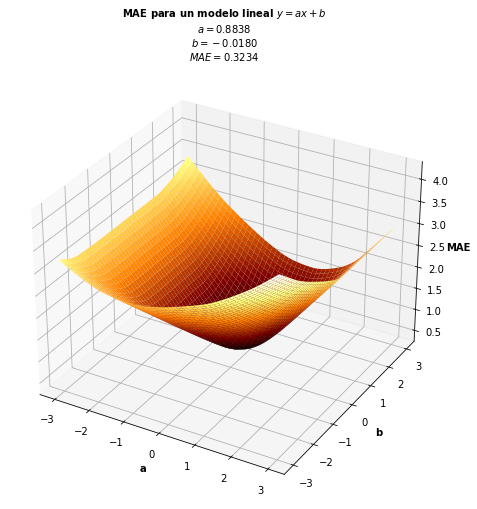

In [66]:
#%matplotlib nbagg
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))

ax.plot_surface(X=aa, Y=bb, Z=MAE,
                cmap=cm.afmhot,
                linewidth=0)

a_min, b_min = a[np.where(MAE==np.min(MAE))[0][0]], b[np.where(MAE==np.min(MAE))[1][0]]
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 10}

ax.set_xlabel("a", **font)
ax.set_ylabel("b", **font)
ax.set_zlabel("MAE", **font)
ax.set_title(f"MAE para un modelo lineal $y=ax+b$\n$a={a_min:.4f}$\n$b={b_min:.4f}$\n$MAE={np.min(MAE):.4f}$",
             **font)
plt.show()

In [67]:
# Comparando con un modelo de regresión lineal
model_proof = Pipeline([
                        ("std", StandardScaler()),
                        ("linear", LinearRegression())
                       ]).fit(X=X_GD_proof, y=y_GD_proof)

print(f"a = {model_proof.get_params()['linear'].coef_[0,0]:.4f}")
print(f"b = {model_proof.get_params()['linear'].intercept_[0]:.4f}")
print(f"MAE = {metrics.mean_absolute_error(y_true=y_GD_proof, y_pred=model_proof.predict(X=X_GD_proof)):.4f}")
print(f"R²  = {metrics.r2_score(y_true=y_GD_proof, y_pred=model_proof.predict(X=X_GD_proof)):.4f}")

a = 0.8893
b = -0.0000
MAE = 0.3238
R²  = 0.7908


Los algoritmos de gradiente descendente buscan minimizar el valor de una función de costo $C(w_0, w_1, w_2...) = C(\textbf w)$ a partir de su derivada que, a modo general, de conoce como gradiente. El algoritmo en principio es sencillo y consiste en realizar actualizaciones a los pesos $w_i$ de forma iterativa hasta alcanzar una tolerancia mínima:

\begin{equation}
   \textbf w \to \textbf w - \eta C(\textbf w)
\end{equation}

donde $\eta$ se conoce como tasa de aprendizaje o Learning Rate en inglés. Ese valor es fundamental en el algoritmo pues es quien determina la rapidez con la cual se encontrarán los valores de los $w_i$ que minimizan la función de costo. Un valor muy grande o muy pequeño de esta podría llevar a que nunca se encuentren los valores óptimos por lo que saber determinar su valor es fundamental. 

Para entender mejor este algoritmo analicemos el siguiente ejemplo. Supongamos que tenemos una función cuadrática como $f(x)=x^2$ (convexa), su derivada (o gradiente) será entonces $\nabla f = 2x$. El algoritmo del gradiente estocástico comienza por elegir aleatoriamente un punto $x$ y a partir de este encontrará el valor mínimo de la función $f(x)$. Si el punto elegido es positivo, digamos $x=2$ entonces el gradiente en ese punto será también positivo, 


$\nabla f(2) = 2\times 2 = 4$

por lo que al multiplicar por la tasa de aprendizaje $\eta=0.1$ y luego por el signo menos el nuevo valor de la variable a minimizar será 

$2 - 0.01\times (2\times2) = 1.6$

Luego este valor se utiliza nuevamente para encontrar el nuevo valor de $x$ que sería

$1.6 - 0.1\times (2\times 1.6) = 1.28 $

y así sucesivamente hasta alcanzar la tolerancia deseada. 

En este ejemplo el valor inicial elegido para $x$ fue positivo al igual que la derivada en dicho punto, por lo que la resta en el algoritmo redujo su valor después de cada iteración. En caso de elegirse un valor negativo de $x$ inicialmente se tendría una derivada negativa en ese punto, siguiendo con el algoritmo, se multiplicaría por la tasa de aprendizaje y luego por el signo menos lo cual daría un termino positivo, al sumar este al valor negativo inicial entonces el valor de $x$ igual se acercaría al valor mínimo requerido. Realicemos un código sencillo para analizar esta situación. 

In [68]:
# Rutina para un gradiente descendente
def SGD(df, x0=[0], eta=0.1, tol=1e-10, max_iter=1000):
    xs = [x0]
    x0 = np.array(x0)
    
    current_iter = 1
    while current_iter<max_iter:
        # Gradiente descendente
        x1 = x0 - eta*df(*x0)
        xs.append(x1)
        
        # Corrobora tolerancia
        if all([abs(x0[i]-x1[i])<tol for i in range(len(x0))]):break
        
        # Actualización
        x0 = x1
        current_iter+=1
    
    return {"x":x1,
            "xs":np.array(xs),
            "iteraciones":current_iter,
            "tol_alcanzada":abs(x0-x1)}

In [69]:
# f(x) = 2x² - 5x + 1
def df1(x): return 4*x-5

# f(x,y) = x² + 3y² - 5x + 2y - 3xy
def df2(x, y): return np.array([2*x-5-3*y, 6*y+2-3*x]) 

sol_sgd_proof1 = SGD(df=df1, x0=[0])
sol_sgd_proof2 = SGD(df=df2, x0=[0,0])

sol_sgd_proof1['x'], sol_sgd_proof2['x']

(array([1.25]), array([8.        , 3.66666667]))

### <code>SGDRegressor</code>

El método <code>SGDRegressor</code> del módulo <code>LinearRegression</code> realiza un gradiente descendente estocástico para ajustar múltiples modelos lineales. El método permite el uso de las siguientes funciones de costo:
   - squared_error
   - huber
   - epsilon_insensitive
   - squared_epsilon_insensitive
   
Así como múltiples penalizaciones que permiten ajustar modelos regularizados:
   - l2
   - l1
   - elasticnet
   - None
   
Por defecto la función de costo será $squared\_error$ con una penalización $l2$, en este caso se está resolviendo un problema de Ridge pero usando gradiente descendente. Estos algoritmos son sensibles al escalado de las features por lo cual siempre deben estarlo para permitir una correcta convergencia. Apliquemos este algoritmo para el modelo estudiado en las secciones anteriores.

In [70]:
from sklearn.model_selection import GridSearchCV

# Elijamos los mejores parámetros para el modelo
best_paramsSGD = GridSearchCV(estimator=Pipeline([
                                            ("std", StandardScaler()),
                                            ("sgd", SGDRegressor(max_iter=int(1e5)))
                                                ]), param_grid=[{"sgd__alpha":np.linspace(1e-3,1,10),
                                                                 "sgd__l1_ratio":np.linspace(0,1,15),
                                                                 "sgd__eta0":np.linspace(1e-3,1,10)}]
                             ).fit(X=X_train, y=y_train)

best_alphaSGD = best_paramsSGD.best_params_["sgd__alpha"]
best_l1SGD    = best_paramsSGD.best_params_["sgd__l1_ratio"]
best_etaSGD   = best_paramsSGD.best_params_["sgd__eta0"]

print(f"alpha = {best_alphaSGD}\nl1 = {best_l1SGD}\neta = {best_etaSGD}")

# Modelo
model_SGD = Pipeline([
                    ("std", StandardScaler()),
                    ("sgd", SGDRegressor(alpha=best_alphaSGD,
                                         l1_ratio=best_l1SGD,
                                         eta0=best_etaSGD
                                        )
                    )])\
                    .fit(X=X_train, y=y_train)

# GridSearh también se puede utilizar para generar el modelo con los mejores parámetros
# en este caso para mantener el ejemplo más claro no se hará así.
model_SGD

alpha = 0.334
l1 = 0.7142857142857142
eta = 0.223


Pipeline(steps=[('std', StandardScaler()),
                ('sgd',
                 SGDRegressor(alpha=0.334, eta0=0.223,
                              l1_ratio=0.7142857142857142))])

In [71]:
model_SGD.get_params()["sgd"].coef_

array([2150.30926273, 1504.12527998, -105.93089283,  839.41123017,
        501.35987258, 2215.73458324])

In [72]:
model_SGD.get_params()["sgd"].n_iter_

17

In [73]:
model_ridge_std.get_params()["Regularización"].coef_

array([4060.56540656, 1320.57847835, -200.51585711,  440.44965037,
        937.61736303, 2214.07574699])

Analicemos los coeficientes del modelo en comparación con los modelos estudiados anteriormente con regularización.

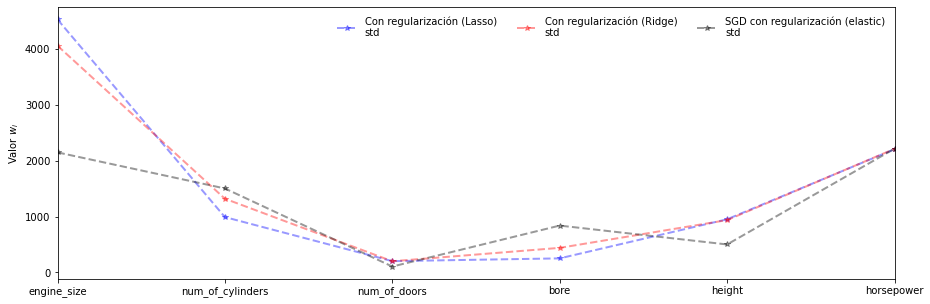

In [74]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(abs(model_lasso_std.get_params()["Lasso"].coef_),  
                                 label="Con regularización (Lasso)\nstd",
                                 color="blue",   marker="*", linestyle="--",  linewidth=2, alpha=0.4)

ax.plot(abs(model_ridge_std.get_params()["Regularización"].coef_),  
                                 label="Con regularización (Ridge)\nstd",
                                 color="red",   marker="*", linestyle="--",  linewidth=2, alpha=0.4)

ax.plot(abs(model_SGD.get_params()["sgd"].coef_),  
                                 label="SGD con regularización (elastic)\nstd",
                                 color="black",   marker="*", linestyle="--",  linewidth=2, alpha=0.4)

ax.set_xticks(ticks=range(len(sel_features)), labels=sel_features, rotation=0)
ax.set_ylabel(r"Valor $w_i$")
ax.set_xlim(0, len(sel_features)-1)
ax.legend(frameon=False, ncol=3)
plt.show()

In [75]:
# Métricas de la predicción
print("SGD modelo con regularización")
print(f"R2_train = {model_SGD.score(X_train, y_train)}")
print(f"R2_test  = {model_SGD.score(X_test, y_test)}")

SGD modelo con regularización
R2_train = 0.7855624150263294
R2_test  = 0.5638287535847659


Es interesante analizar la velocidad con la que <code>SGDRegressor</code> converge como función de la tasa de aprendizaje $\eta$.

In [76]:
etas = np.logspace(-4, 2, 1000)
n_iters = []

for eta in etas:
    model_SGD_etai = n_iters.append(
                Pipeline([
                    ("std", StandardScaler()),
                    ("sgd", SGDRegressor(alpha=best_alphaSGD,
                                         l1_ratio=best_l1SGD,
                                         eta0=eta,
                                         learning_rate="constant",
                                         max_iter=int(1e5)
                                        )
                    )])\
                    .fit(X=X_train, y=y_train).get_params()["sgd"].n_iter_
    )

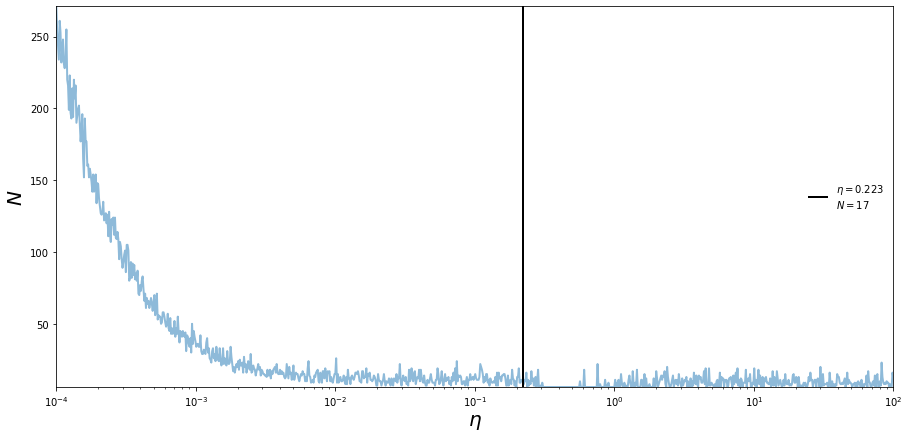

In [77]:
# Plot
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(etas, n_iters, linewidth=2, alpha=0.5)
    
ax.set_xlim(min(etas), max(etas))
ax.set_ylim(min(n_iters), max(n_iters))

ax.vlines(x=best_etaSGD,
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],
          color="k", linewidth=2, alpha=1,
          label=f"$\eta={best_etaSGD}$\n$N={model_SGD.get_params()['sgd'].n_iter_}$")

ax.hlines(y=0, xmin=min(etas), xmax=max(etas), color="k", alpha=1, linewidth=1.5, linestyle="--")

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 20}
ax.set_xlabel(r"$\eta$", **font)
ax.set_ylabel(r"$N$", **font)
ax.set_xscale("log")
plt.legend(frameon=False, ncol=1, loc="center right")
plt.show()

Los valores de $\eta$ afectan considerablemente la rapidez con la cual el modelo converge a una solución.

## Regresión polinómica